**EDA on Lower Back-Pain Symptoms Dataset**

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
import os
os.listdir("../input/lower-back-pain-symptoms-dataset")

['Dataset_spine.csv']

In [3]:
dataset = pd.read_csv("../input/lower-back-pain-symptoms-dataset/Dataset_spine.csv")
dataset.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


In [4]:
# Unnecessary column
dataset.iloc[:,-1:].head()

,Unnamed: 13
0,NaN
1,NaN
2,Prediction is done by using binary classificat...
3,NaN
4,NaN


In [5]:
# removing Unnecessary column
del dataset["Unnamed: 13"]

**Summarisation of Dataset**

In [6]:
dataset.describe()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


In [7]:
# Change the Column names
dataset.rename(columns = {
    "Col1" : "pelvic_incidence", 
    "Col2" : "pelvic_tilt",
    "Col3" : "lumbar_lordosis_angle",
    "Col4" : "sacral_slope", 
    "Col5" : "pelvic_radius",
    "Col6" : "degree_spondylolisthesis", 
    "Col7" : "pelvic_slope",
    "Col8" : "direct_tilt",
    "Col9" : "thoracic_slope", 
    "Col10" :"cervical_tilt", 
    "Col11" : "sacrum_angle",
    "Col12" : "scoliosis_slope", 
    "Class_att" : "class"}, inplace=True)

In [8]:
dataset.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [9]:
dataset.shape

(310, 13)

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
pelvic_slope                310 non-null float64
direct_tilt                 310 non-null float64
thoracic_slope              310 non-null float64
cervical_tilt               310 non-null float64
sacrum_angle                310 non-null float64
scoliosis_slope             310 non-null float64
class                       310 non-null object
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


# Visualize the number of abnormal and normal cases
The tendency of abnormal cases is 2 times higher than the normal cases

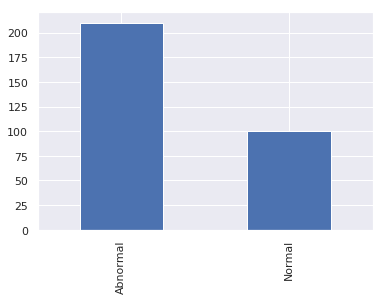

In [11]:
dataset["class"].value_counts().sort_index().plot.bar()

**Correlation between features**

A correlation coefficient is a numerical measure of some type of correlation,meaning a statistical relationship between two variables.

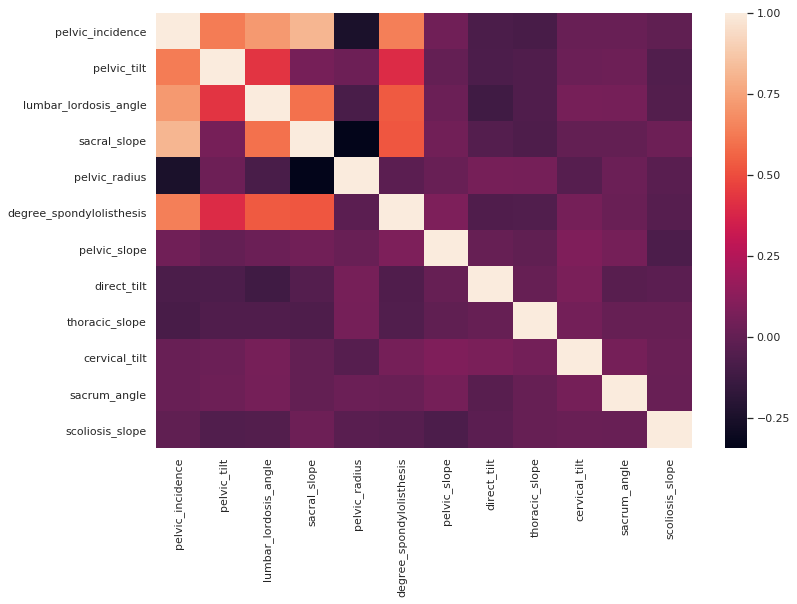

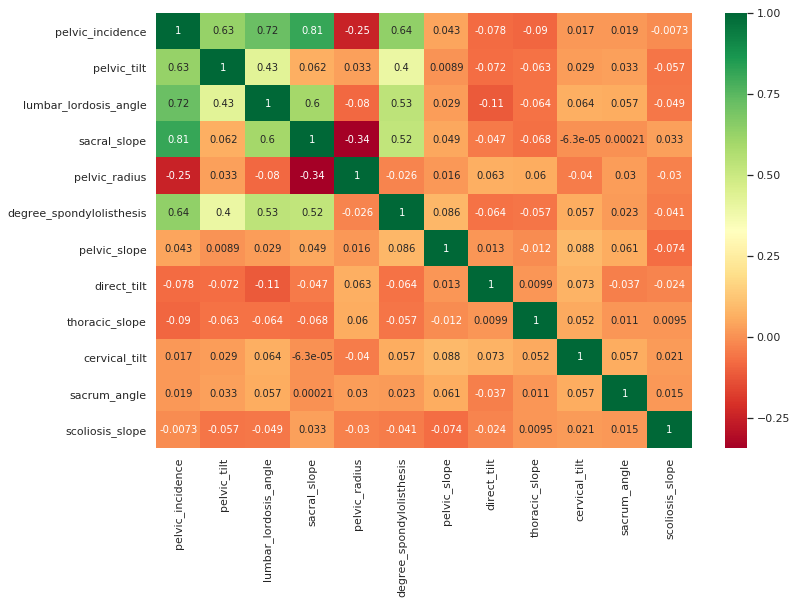

In [12]:
plt.subplots(figsize=(12,8))
sns.heatmap(dataset.corr())

plt.figure(figsize=(12,8))
p=sns.heatmap(dataset.corr(), annot=True,cmap='RdYlGn')

**Custom correlogram**

A pair plot allows us to see both distribution of single variables and relationships between two variables.

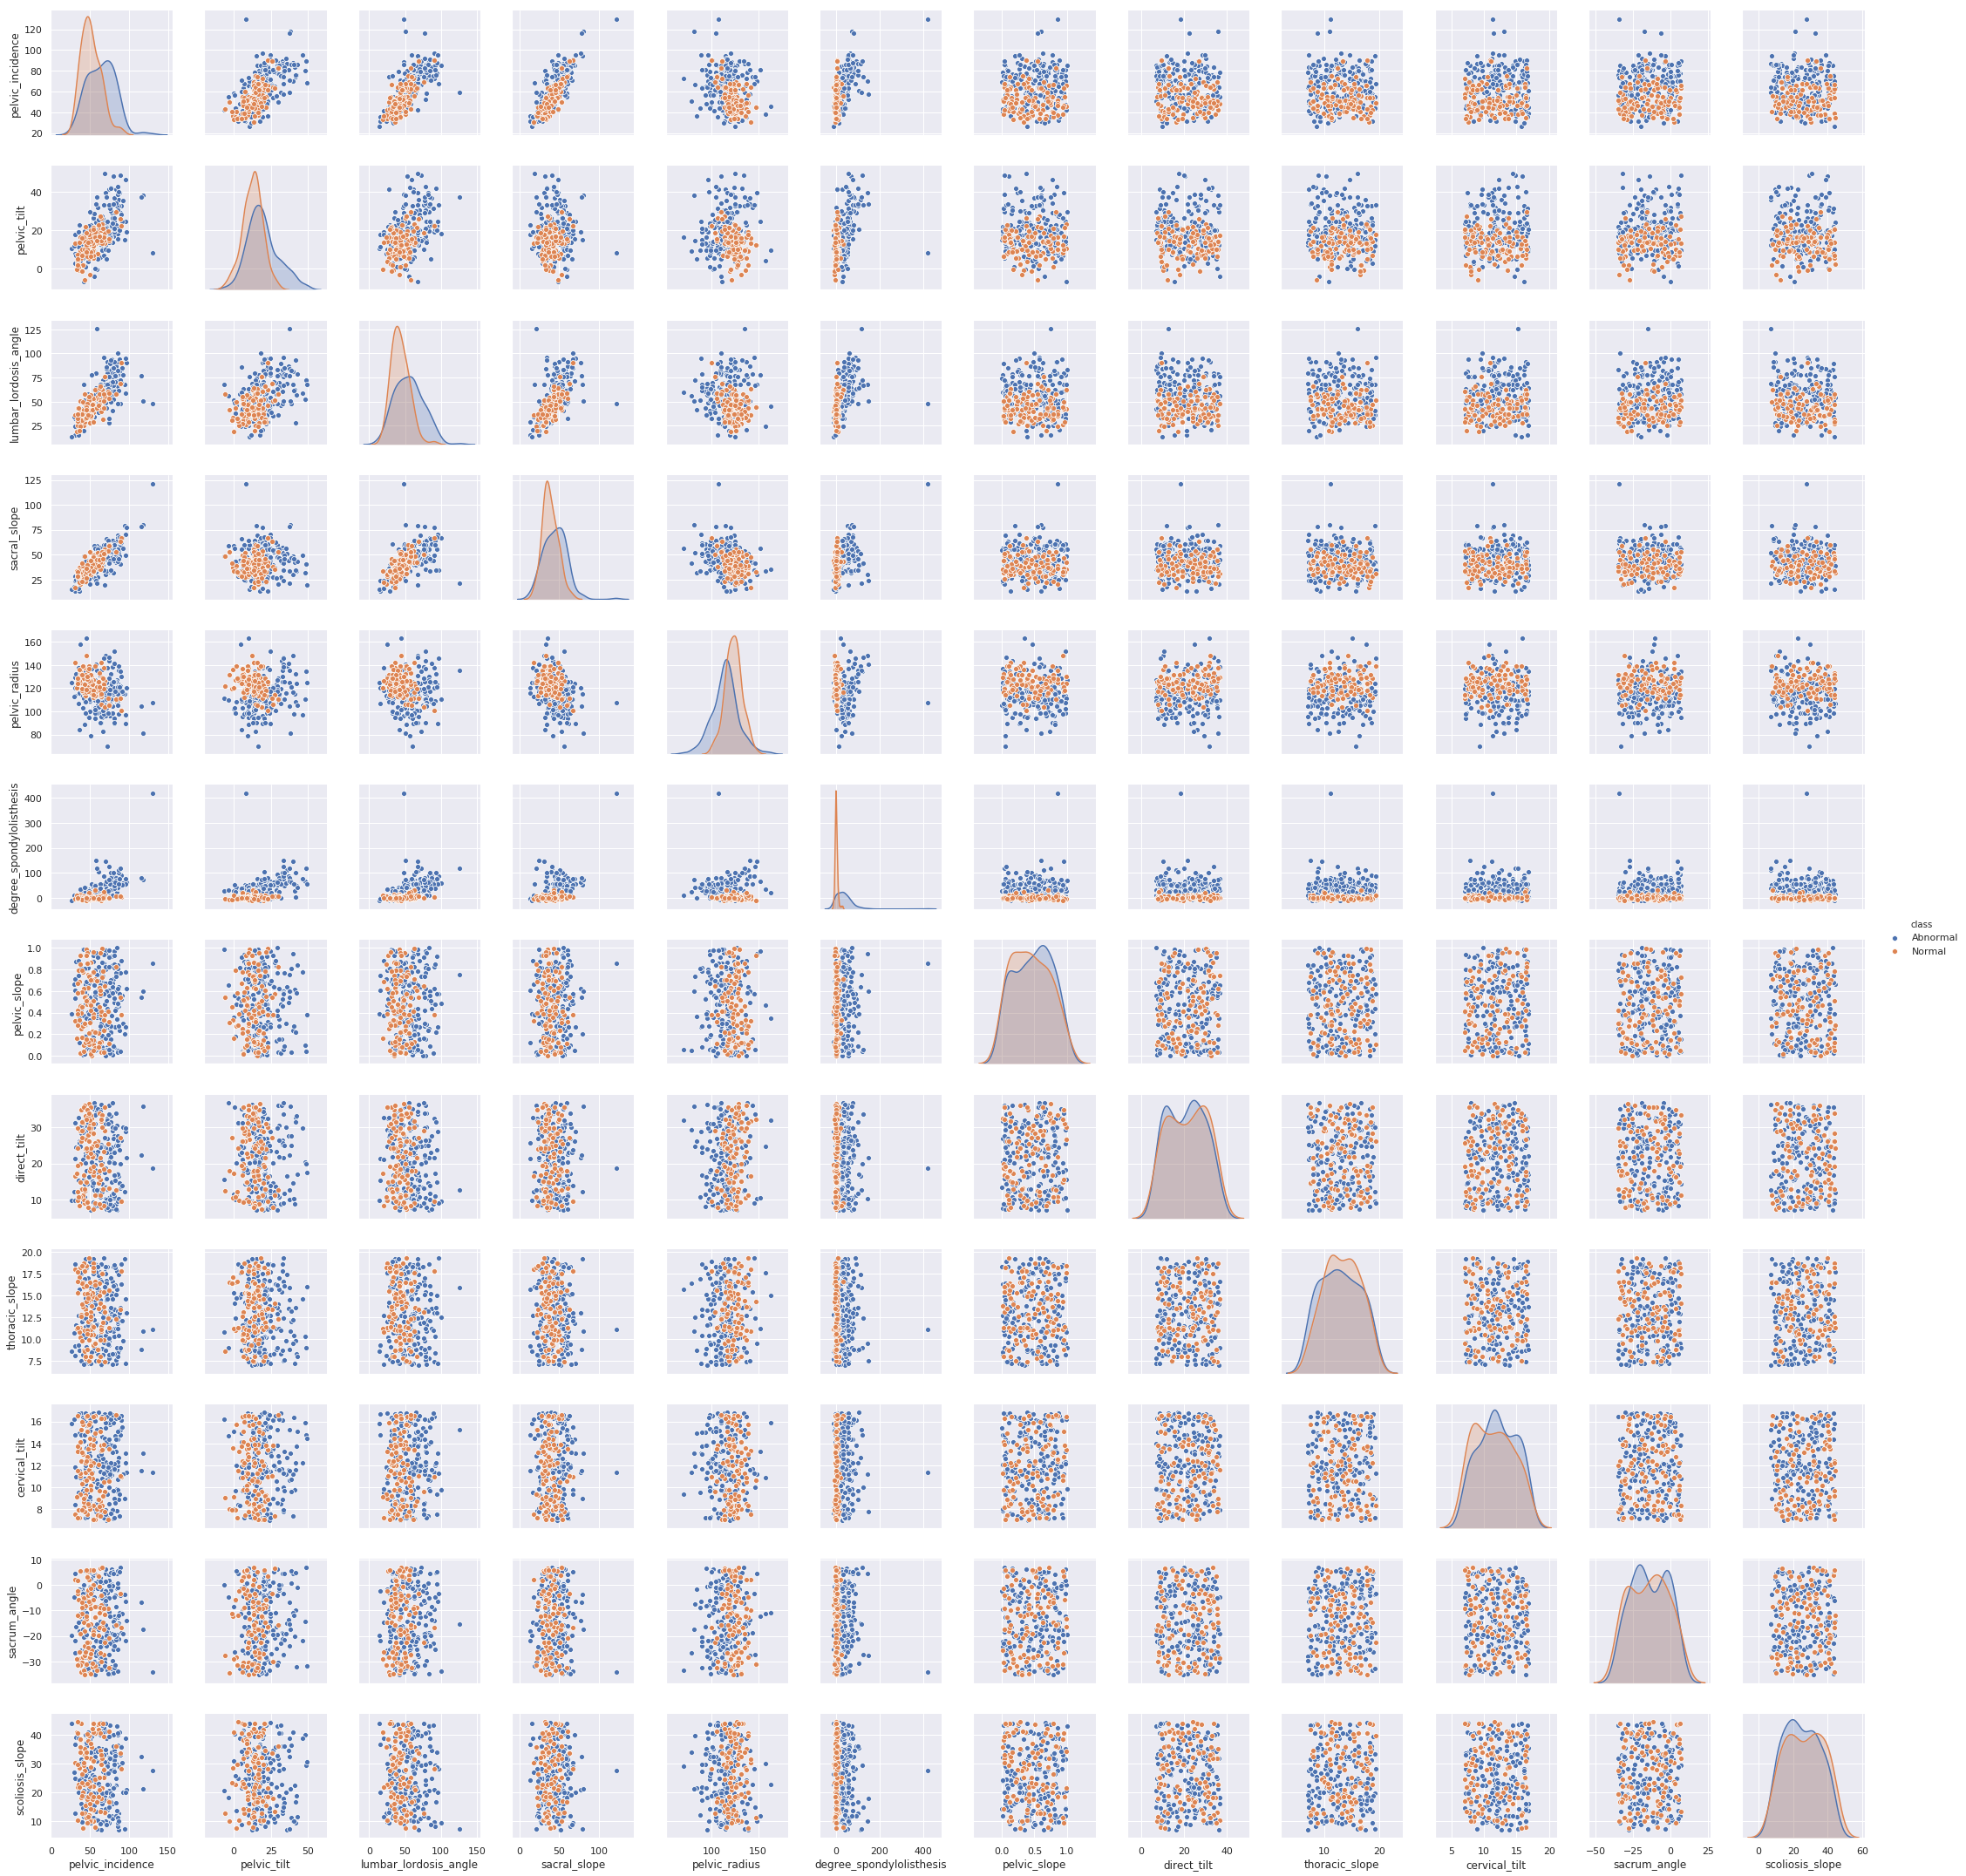

In [13]:
sns.pairplot(dataset, hue="class")

**Histogram of Each Feature**

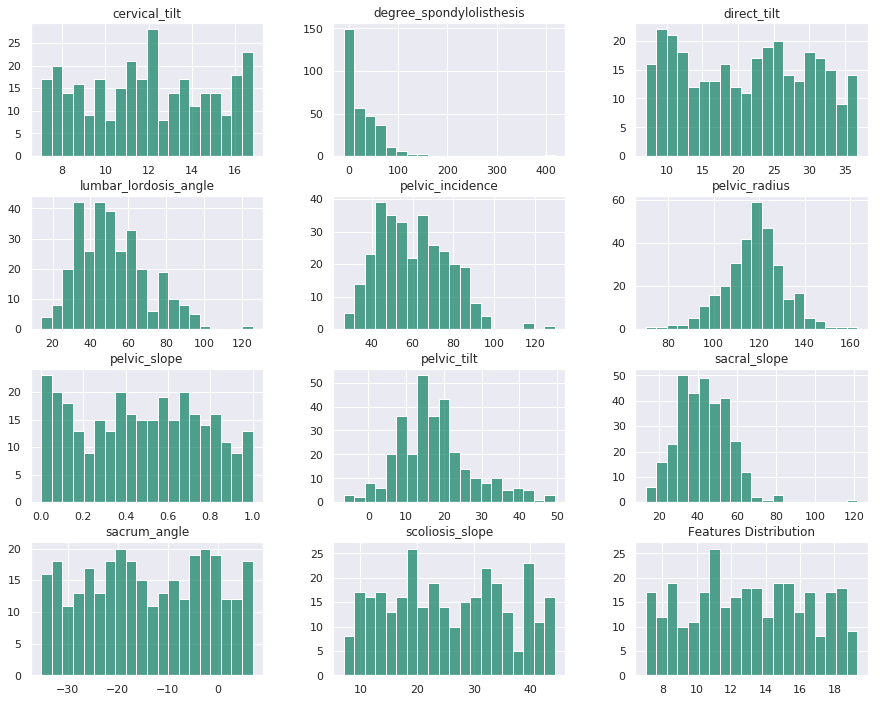

In [14]:
dataset.hist(figsize=(15,12),bins = 20, color="#007959AA")
plt.title("Features Distribution")
plt.show()

**Detecting and Removing Outliers**

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 12 Text xticklabel objects>)

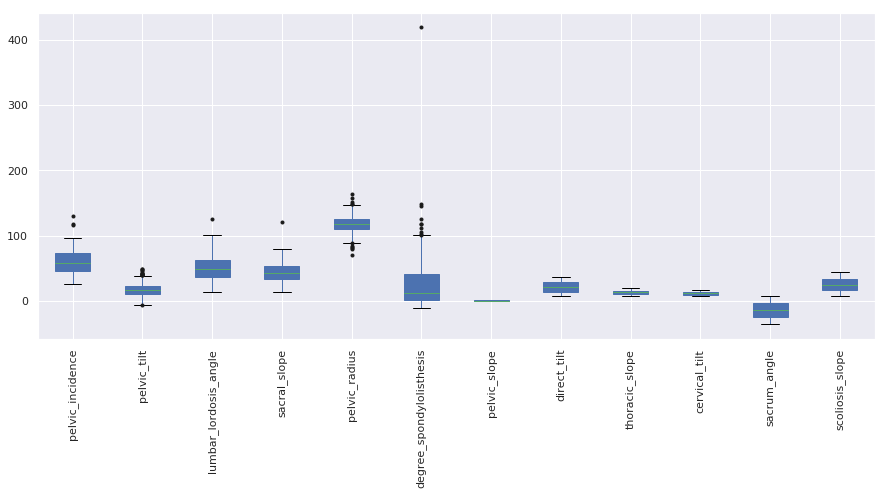

In [15]:
plt.subplots(figsize=(15,6))
dataset.boxplot(patch_artist=True, sym="k.")
plt.xticks(rotation=90)

**Detect and Remove Outliers by hand**

In [16]:
#Detecting Outliers
#Inter Quartile Range is the distance between the 3rd Quartile and 1st Quartile

minimum = 0
maximum = 0

def detect_outlier(feature):
    first_q = np.percentile(feature, 25)
    third_q = np.percentile(feature, 75) 
    IQR = third_q - first_q
    IQR *= 1.5
    minimum = first_q - IQR 
    maximum = third_q + IQR
    flag = False
    
    if(minimum > np.min(feature)):
        flag = True
    if(maximum < np.max(feature)):
        flag = True
    
    return flag

In [17]:
#Using Tukey-Method to remove Outliers.
#Whiskers are set at 1.5 times Interquartile Range(IQR)

def  remove_outlier(feature):
    first_q = np.percentile(X[feature], 25)
    third_q = np.percentile(X[feature], 75)
    IQR = third_q - first_q
    IQR *= 1.5
    
    minimum = first_q - IQR # the acceptable minimum value
    maximum = third_q + IQR # the acceptable maximum value
    
    median = X[feature].median()
    
    """
    # any value beyond the acceptance range are considered
    as outliers. 
    # we replace the outliers with the median value of that 
      feature.
    """
    
    X.loc[X[feature] < minimum, feature] = median 
    X.loc[X[feature] > maximum, feature] = median

# taking all the columns except the last one
# last column is the label

X = dataset.iloc[:, :-1]
for i in range(len(X.columns)): 
        remove_outlier(X.columns[i])

In [18]:
X = dataset.iloc[:, :-1]

In [19]:
#Detecting Outliers column-wise
for i in range(len(X.columns)):
    if(detect_outlier(X[X.columns[i]])):
        print(X.columns[i], "Contains Outliers")

pelvic_incidence Contains Outliers
pelvic_tilt Contains Outliers
lumbar_lordosis_angle Contains Outliers
sacral_slope Contains Outliers
pelvic_radius Contains Outliers
degree_spondylolisthesis Contains Outliers


**REASON FOR OUTLIERS REMOVAL:-**

* Outliers are extreme values that deviate from other observations on data. 
* Outliers in input data can mislead the training process of machine learning algorithms resulting in longer training times, less accurate models.

In [20]:
#Removing Outliers
for i in range (3):
    for i in range(len(X.columns)):
        remove_outlier(X.columns[i])

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 12 Text xticklabel objects>)

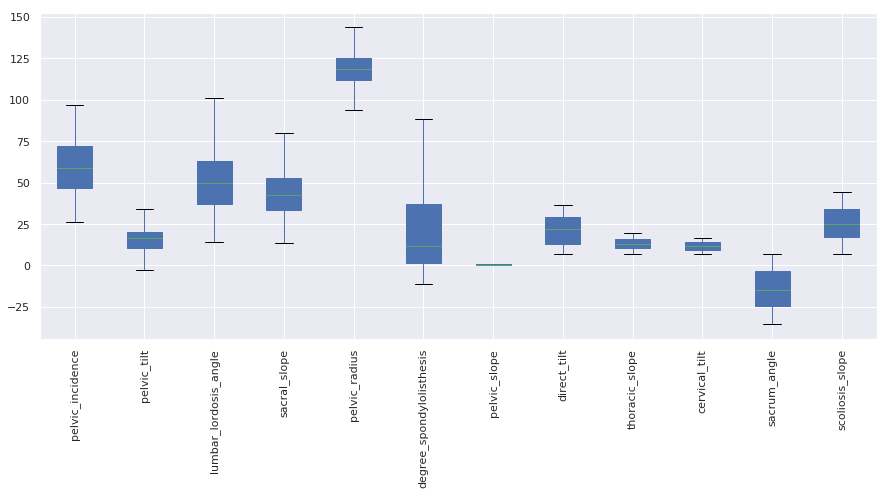

In [21]:
#After removing Outliers
plt.subplots(figsize=(15,6))
X.boxplot(patch_artist=True, sym="k.")
plt.xticks(rotation=90)

**Feature Scaling**

*  Feature scaling though standardization (or Z-score normalization) can be an important preprocessing step for many machine learning algorithms.
*  Our dataset contain features with highly varying in magnitudes, units and range. 
*  But since, most of the machine learning algorithms use Eucledian distance between two data points in their computations, this will create a problem. 
*  To avoid this effect, we need to bring all features to the same level of magnitudes.
*  This can be acheived by feature scaling.

In [22]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X)
scaled_df = pd.DataFrame(data = scaled_data, columns = X.columns)
scaled_df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
0,0.523049,0.684601,0.295226,0.408699,0.099877,0.108734,0.744554,0.186396,0.610506,0.845115,0.156861,0.977797
1,0.183082,0.349535,0.126987,0.235632,0.415357,0.157231,0.413783,0.197208,0.854170,0.996300,0.230878,0.243812
2,0.605368,0.675639,0.416076,0.501244,0.246507,0.075764,0.473750,0.666533,0.850409,0.983442,0.148026,0.327166
3,0.611962,0.740938,0.349432,0.471552,0.163957,0.224132,0.367741,0.556360,0.461461,0.448790,0.113989,0.316741
4,0.334210,0.338566,0.165053,0.402451,0.290294,0.190990,0.542524,0.957940,0.725757,0.188118,0.447450,0.479711


> **Label Encoding**

* Certain algorithms like XGBoost can only have numerical values as their predictor variables.
* Hence we need encode our categorical values. LabelEncoder from sklearn.preprocessing package encode labels with value between 0 and n_classes-1.

In [23]:
label = dataset["class"]

encoder = LabelEncoder()
label = encoder.fit_transform(label)

In [24]:
X = scaled_df
y = label 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [25]:
clf_gnb = GaussianNB()
pred_gnb = clf_gnb.fit(X_train, y_train).predict(X_test)
accuracy_score(pred_gnb, y_test)

0.8085106382978723

In [26]:
clf_svc = SVC(kernel="linear")
pred_svc = clf_svc.fit(X_train, y_train).predict(X_test)
accuracy_score(pred_svc, y_test)

0.7872340425531915

In [27]:
clf_xgb =  XGBClassifier()
pred_xgb = clf_xgb.fit(X_train, y_train).predict(X_test)
accuracy_score(pred_xgb, y_test)

0.8297872340425532

In [28]:
confusion_matrix(pred_xgb, y_test)

array([[29,  6],
       [ 2, 10]])

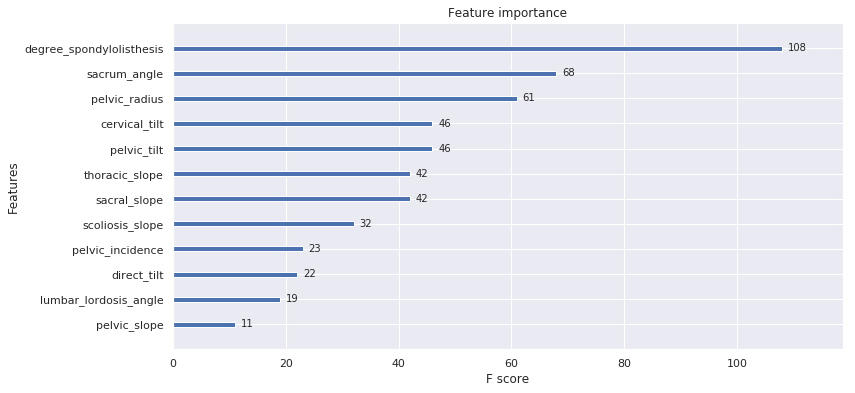

In [29]:
fig, ax = plt.subplots(figsize=(12, 6))
plot_importance(clf_xgb, ax=ax)

**Marginal plot**

A marginal plot allows to study the relationship between 2 numeric variables. The central chart display their correlation.

Lets visualize the relationship between degree_spondylolisthesis and class.

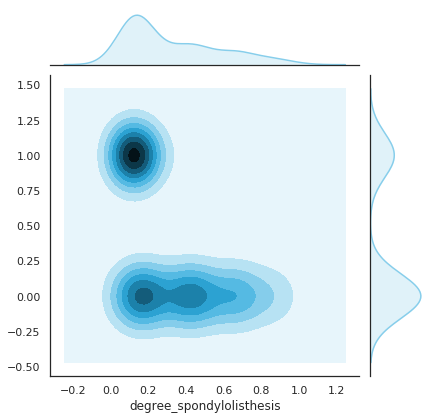

In [30]:
sns.set(style="white", color_codes=True)
sns.jointplot(x=X["degree_spondylolisthesis"], y=label, kind='kde', color="skyblue")

**KNN-MODELING**

In [31]:
#Importing train_test_split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42, stratify=y)
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [32]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [33]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 87.09677419354838 % and k = [9, 11, 13]


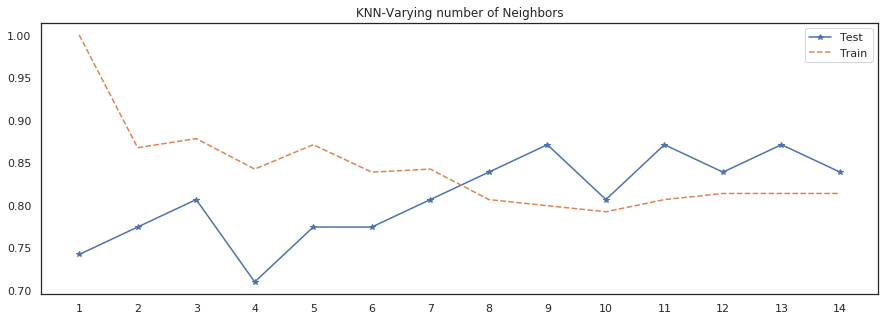

In [34]:
import matplotlib
plt.figure(figsize=(15,5))
plt.title('KNN-Varying number of Neighbors')
plt.plot(range(1,15),test_scores,label="Test", marker='*')
plt.plot(range(1,15),train_scores,label="Train",linestyle='--')
plt.legend()
plt.xticks(range(1,15))
plt.show()

**Performing KNN at k = 13 (best test score parameter and prime number)**

In [35]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(13)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.8709677419354839

In [36]:
y_pred = knn.predict(X_test)

Text(0.5, 12.5, 'Predicted label')

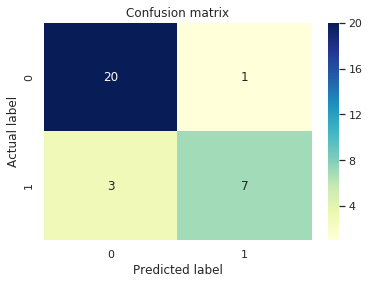

In [37]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [38]:
#Import Classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91        21
           1       0.88      0.70      0.78        10

    accuracy                           0.87        31
   macro avg       0.87      0.83      0.84        31
weighted avg       0.87      0.87      0.87        31



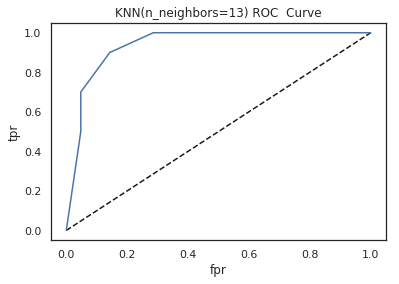

In [39]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='KNN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('KNN(n_neighbors=13) ROC  Curve')
plt.show()